In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import datetime as dt
import unicodedata

import tweepy as np
import regex as re

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet') ##################### need this line or will get error
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords


C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# libraries
import os, sys
import pandas as pd
import pickle
import re,string
import nltk
# import spacy
import sklearn,gensim,tweepy,pyLDAvis
from wordcloud import WordCloud

In [9]:

# stop = set(stopwords.words('english'))
# stopwords = set(stopwords.words('english'))
# df = pd.read_csv(r'..\tweets_01-08-2021.csv')
df = pd.read_csv(r'C:\Users\morrismr\Downloads\tweets_01-08-2021.csv')
df.columns
print(df.head())


C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                    id                                               text  \
0    98454970654916608  Republicans and Democrats have both created ou...   
1  1234653427789070336  I was thrilled to be back in the Great city of...   
2  1218010753434820614  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1304875170860015617  The Unsolicited Mail In Ballot Scam is a major...   
4  1218159531554897920  RT @MZHemingway: Very friendly telling of even...   

  isRetweet isDeleted              device  favorites  retweets  \
0         f         f           TweetDeck         49       255   
1         f         f  Twitter for iPhone      73748     17404   
2         t         f  Twitter for iPhone          0      7396   
3         f         f  Twitter for iPhone      80527     23502   
4         t         f  Twitter for iPhone          0      9081   

                  date isFlagged  
0  2011-08-02 18:07:48         f  
1  2020-03-03 01:34:50         f  
2  2020-01-17 03:22:47         f  


In [10]:

def check_for_retweets(text):
    if ("RT @") in text:
        return True
    else:
        False

df['RT'] = df['text'].apply(check_for_retweets)



def strip_Text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'\[.*?\]', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    # text = re.sub("https?://([^\s]+)", ' ', text) # links
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    
    text = re.sub("rt", ' ', text) # RT : 
    text = re.sub(" &amp", ' ', text) # &amp
    text = re.sub("[\n\r\t\0]", ' ', text) # new line, tabs, etc
    text = re.sub('[!,.-;:\"“”\[\]{}]', ' ', text) # punct
    text = re.sub('\s{2,}', ' ', text) # 2+ whitespaces
   
    return text


def clean(doc):
    lemma = WordNetLemmatizer()
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    # punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized



C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:23: DeprecationWarning: invalid escape sequence \[
<>:24: DeprecationWarning: invalid escape sequence \s
<>:23: DeprecationWarning: invalid escape sequence \[
<>:24: DeprecationWarning: invalid escape sequence \s
<ipython-input-10-e6f0284853e2>:23: DeprecationWarning: invalid escape sequence \[
  text = re.sub('[!,.-;:\"“”\[\]{}]', ' ', text) # punct
<ipython-input-10-e6f0284853e2>:24: DeprecationWarning: invalid escape sequence \s
  text = re.sub('\s{2,}', ' ', text) # 2+ whitespaces


In [11]:
df['text_cleaned'] = df['text'].apply(strip_Text)
df['text_cleaned'] = df['text_cleaned'].apply(clean)
tweets_df=df.loc[:,['text']]
tweets_df.info()

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    56571 non-null  object
dtypes: object(1)
memory usage: 442.1+ KB


In [12]:
a = 56500
for i in range(a,a+10):
    print(tweets_df.text[i])
    print()


Great support coming from all sides for Border Security (including Wall) on our very dangerous Southern Border. Teams negotiating this weekend! Washington Post and NBC reporting of events, including Fake sources, has been very inaccurate (to put it mildly)!

Thank you to Kanye West for your nice words. Criminal Justice Reform is now law - passed in a very bipartisan way!

Great new book by Dr. Robert Jeffress, “Choosing the Extraordinary Life.” Get it and enjoy!  @LouDobbs

The story in the New York Times regarding Jim Webb being considered as the next Secretary of Defense is FAKE NEWS. I’m sure he is a fine man, but I don’t know Jim, and never met him. Patrick Shanahan, who is Acting Secretary of Defense, is doing a great job!

GREAT JOBS NUMBERS JUST ANNOUNCED!

How do you impeach a president who has won perhaps the greatest election of all time, done nothing wrong (no Collusion with Russia, it was the Dems that Colluded), had the most successful first two years of any president, and

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Add additional feature 'retweeted'
values = []

tweets = df['text'].to_list()
for tweet in tweets:
    if tweet.startswith('RT'):
        value = True
    else:
        value = False

    values.append(value)
    
df['retweeted'] = values

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize_lemma_stopwords(text):
	tokens = nltk.tokenize.word_tokenize(text.lower()) # split string into words (tokens)
	tokens = [t for t in tokens if t.isalpha()] # keep strings with only alphabets
	tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
	tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
	tokens = [t for t in tokens if t not in stopwords] # remove stopwords

	return tokens

def dataCleaning(data):
	data["content"] = data["content"].apply(tokenize_lemma_stopwords)
	return data

df['date_cleaned'] = pd.to_datetime(df['date']).dt.date
df_2016 = df[(df.date_cleaned >= dt.date(2015, 8,1)) & (df.date_cleaned <= dt.date(2016, 12, 1))]
df_2019 = df[(df.date_cleaned >= dt.date(2018, 12,1)) & (df.date_cleaned <= dt.date(2019, 4, 1))]
df_2020 = df[(df.date_cleaned >= dt.date(2019, 8,1)) & (df.date_cleaned <= dt.date(2020, 12, 1))]
# LDA requires (works better with) some basic level of pre-processing
# pre-process text: text data cleanining, Tokenize and remove stop words
   

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
cleanedData = df['text'].apply(tokenize_lemma_stopwords)
cleanedData_2016 = df_2016['text'].apply(tokenize_lemma_stopwords)
cleanedData_2019 = df_2019['text'].apply(tokenize_lemma_stopwords)
cleanedData_2020 = df_2020['text'].apply(tokenize_lemma_stopwords)

X = cleanedData.copy()
X_2016 = cleanedData_2016.copy()
X_2019 = cleanedData_2019.copy()
X_2020 = cleanedData_2020.copy()

my_list = [cleanedData, cleanedData_2016, cleanedData_2019, cleanedData_2020]

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
for df_ in my_list:
    print(i)
    i += 1
    X = df_.copy()
    
    # Create a dictionary for vocabulary words with it's index and count
    dictionary = gensim.corpora.Dictionary(X)
    
    # filter words that occurs in less than 5 documents and words that occurs in more than 50% of total documents
    # keep top 100000 frequent words
    dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
    
    
    # filter words that occurs in less than 5 documents and words that occurs in more than 50% of total documents
    # keep top 100000 frequent words
    
    # create bag-of-words ==> list(index, count) for words in doctionary
    bow_corpus = [dictionary.doc2bow(doc) for doc in X]
    
    
    
    
    # Create lda model with gensim library
    # Manually pick number of topic:
    # Then based on perplexity scoring, tune the number of topics
    
    lda_model = gensim.models.LdaModel(bow_corpus,
                                      id2word=dictionary,
                                      num_topics=7,
                                      offset=2,
                                      random_state=100,
                                      update_every=1,
                                      passes=10,
                                      alpha='auto',
                                      eta="auto",
                                      per_word_topics=True)
    
    # lda_model.save("20_news_group.model")
    
    from pprint import pprint
    pprint(lda_model.print_topics())
    doc_lda = lda_model[bow_corpus]
  

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


56509
[(0,
  '0.053*"amp" + 0.036*"border" + 0.021*"wall" + 0.019*"american" + '
  '0.015*"must" + 0.014*"crime" + 0.014*"security" + 0.013*"work" + '
  '0.011*"working" + 0.010*"law"'),
 (1,
  '0.145*"http" + 0.084*"great" + 0.035*"thank" + 0.023*"today" + 0.012*"love" '
  '+ 0.012*"last" + 0.012*"whitehouse" + 0.010*"see" + 0.009*"foxnews" + '
  '0.009*"foxandfriends"'),
 (2,
  '0.025*"fbi" + 0.022*"mueller" + 0.016*"nancy" + 0.015*"pelosi" + '
  '0.014*"john" + 0.013*"justice" + 0.013*"case" + 0.013*"court" + '
  '0.011*"shutdown" + 0.010*"general"'),
 (3,
  '0.028*"people" + 0.017*"news" + 0.017*"would" + 0.017*"many" + 0.016*"want" '
  '+ 0.015*"never" + 0.015*"fake" + 0.013*"much" + 0.012*"democrat" + '
  '0.012*"medium"'),
 (4,
  '0.044*"big" + 0.044*"job" + 0.034*"good" + 0.017*"meeting" + '
  '0.017*"economy" + 0.016*"dollar" + 0.016*"record" + 0.015*"billion" + '
  '0.015*"thanks" + 0.015*"hunt"'),
 (5,
  '0.039*"democrat" + 0.036*"republican" + 0.023*"dems" + 0.020*"history"

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
tweets_df_clean = pd.DataFrame(tweets_df.text.apply(lambda x: strip_Text(x)))
from nltk.corpus import wordnet

stop = set(stopwords.words('english'))
def lemmatizer(doc):
    lemma = WordNetLemmatizer()
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
#     punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized

tweets_df_clean = pd.DataFrame(tweets_df_clean.text.apply(lambda x: lemmatizer(x)))
tweets_df_clean['text'] = tweets_df_clean['text'].str.replace('-PRON-', '')

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


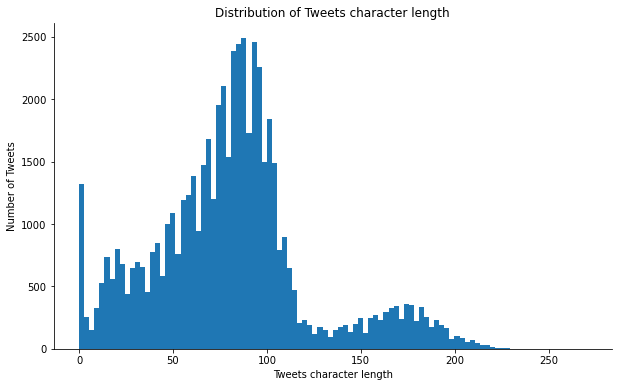

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df_clean.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


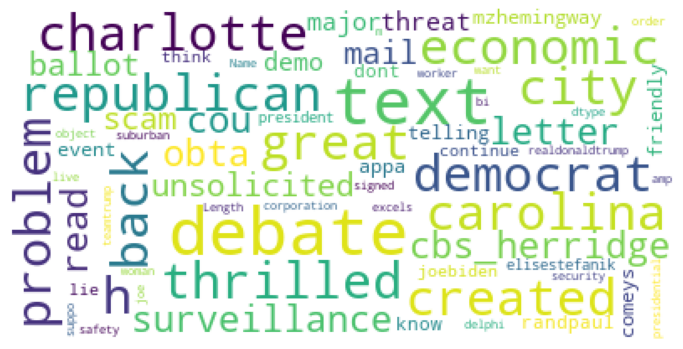

In [27]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(tweets_df_clean.text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(tweets_df_clean.text, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unigram,count
0,realdonaldtrump,10918
1,trump,7716
2,great,7578
3,amp,5558
4,president,4800
5,thank,3572
6,people,3507
7,country,2750
8,new,2511
9,america,2441


In [29]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(tweets_df_clean.text, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
trigram

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,trigram,count
0,make america great,595
1,fake news medium,259
2,complete total endorsement,225
3,realdonaldtrump run president,171
4,happy bi hday,149
5,crooked hillary clinton,137
6,teamtrump president realdonaldtrump,135
7,new york time,127
8,whitehouse president realdonaldtrump,121
9,radical left democrat,114


In [30]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )

data_matrix = vectorizer.fit_transform(tweets_df_clean.text)
data_matrix

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<56571x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 475865 stored elements in Compressed Sparse Row format>

In [31]:
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )

lda_output = lda_model.fit_transform(data_matrix)

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
p=pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')
p=pyLDAvis.save_html(p, '../output/lda_original_v2.html')

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\morrismr\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [33]:
topic_values = lda_model.transform(data_matrix)
tweets_df['Topic'] = topic_values.argmax(axis=1)
tweets_df.head()

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,Topic
0,Republicans and Democrats have both created ou...,0
1,I was thrilled to be back in the Great city of...,6
2,RT @CBS_Herridge: READ: Letter to surveillance...,4
3,The Unsolicited Mail In Ballot Scam is a major...,5
4,RT @MZHemingway: Very friendly telling of even...,1


In [34]:
print('Attempting alternate method, LSA, based on the SVD, to see if we get clearer results')
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['text'])

X.shape # check shape of the document-term matrix
svd_model.fit(X)

len(svd_model.components_)

terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0] + " ")
   

C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Attempting alternate method, LSA, based on the SVD, to see if we get clearer results
Topic 0: 
https 
rt 
thank 
realdonaldtrump 
great 
trump 
president 
Topic 1: 
realdonaldtrump 
rt 
trump 
thanks 
president 
great 
http 
Topic 2: 
thanks 
https 
great 
true 
nice 
luck 
good 
Topic 3: 
thank 
great 
http 
america 
make 
trump2016 
amp 
Topic 4: 
thank 
realdonaldtrump 
rt 
president 
trump2016 
run 
whitehouse 
Topic 5: 
great 
rt 
america 
make 
people 
job 
amp 
Topic 6: 
rt 
thank 
thanks 
amp 
http 
democrats 
whitehouse 
Topic 7: 
http 
realdonaldtrump 
rt 
great 
cont 
barackobama 
interview 
Topic 8: 
trump 
great 
rt 
donald 
america 
make 
mr 
Topic 9: 
president 
http 
run 
america 
make 
obama 
whitehouse 
Topic 10: 
america 
make 
amp 
true 
vote 
trump2016 
let 
Topic 11: 
amp 
trump 
great 
realdonaldtrump 
vote 
president 
law 
Topic 12: 
true 
amp 
president 
great 
rt 
honor 
whitehouse 
Topic 13: 
people 
vote 
country 
american 
don 
want 
run 
Topic 14: 
good 
p

In [35]:
print("Overall LDA was much more effective than LSA in extracting human-interpretable concepts")

Overall LDA was much more effective than LSA in extracting human-interpretable concepts


C:\Users\morrismr\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
